## Q3. (20 points) In this question, you use the code segments provided in the tutorial to implement the k-means and k-medoid algorithms as follows:

1. kmeans k input-file output-file 
2. kmedoids k input-file output-file

k-means and k-medoid algorithms as follows: The input-file is the dataset (with one sample per line), and the output-output is a png file, which use different colors to show the different clusters. An example is shown below.

__Please find the code inside "q2.py" that uses sys argv[] to run the kmeans and kmediod in the folder. This is the visual representation used for solution__

In [2]:
# Copying code segment from Lab 5
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
 
 
class Clustering():
    def __init__(self, k_num_center = 2, outlier = True, method = 'Mean'):
        self.k_num_center = k_num_center
        self.method = method
        if outlier:
            self.data = np.array([[1,2],[3,2],[5,1],[3,5],[8,7],[12,8],[10,9],[0,0],[40,40]])
            target = np.array([1,2,3,4,5,6,7,8,9])
        else:
            self.data = np.array([[1,2],[3,2],[5,1],[3,5],[8,7],[12,8],[10,9],[0,0]])
            target = np.array([1,2,3,4,5,6,7,8])
        pyplot.scatter(self.data[:,0],self.data[:,1], c = target)
        pyplot.show()
    
    def ou_distance(self,x,y):
        return np.sqrt(sum(np.square(x-y)))
    
    def run_k_means(self, func_of_dis):
        indexs = list(range(len(self.data)))
        random.shuffle(indexs)
        init_centroids_index = indexs[:self.k_num_center]
        centroids = self.data[init_centroids_index,:]
        levels = list(range(self.k_num_center))
        print("start iteration")
        sample_target = []
        for i in range(10):
            new_centroids = [[] for i in range(self.k_num_center)]
            new_centroids_num = [0 for i in range(self.k_num_center)]
            sample_target = []

            for sample in self.data:
                distances = [self.ou_distance(sample, centroid) for centroid in centroids]
                cur_level = np.argmin(distances)
                sample_target.append(cur_level)


                new_centroids_num[cur_level]+=1
                if len(new_centroids[cur_level]) < 1:
                    new_centroids[cur_level] = sample
                else: 
                    new_centroids[cur_level] = new_centroids[cur_level]+sample

            centroids = list()
            for centroid, num in zip(new_centroids, new_centroids_num):
                centroids.append([item/num for item in centroid])
            centroids = np.array(centroids)

        print('end')
        return sample_target

    def run_k_center(self, func_of_dis):
        print('randomly create', self.k_num_center, 'centers')
        indexs = list(range(len(self.data)))
        random.shuffle(indexs)
        init_centroids_index = indexs[:self.k_num_center]
        centroids = self.data[init_centroids_index,:]
        levels = list(range(self.k_num_center))
        print("start iteration")
        sample_target = []
        if_stop = False
        while(not if_stop):
            if_stop = True
            classify_points = [[centroid] for centroid in centroids]
            sample_target = []

            for sample in self.data:
                distances = [func_of_dis(sample, centroid) for centroid in centroids]
                cur_level = np.argmin(distances)
                sample_target.append(cur_level)
                classify_points[cur_level].append(sample)

            for i in range(self.k_num_center):
                distances = [func_of_dis(point_1, centroids[i]) for point_1 in classify_points[i]]
                now_distances = sum(distances)
                for point in classify_points[i]:
                    distances = [func_of_dis(point_1, point) for point_1 in classify_points[i]]
                    new_distance = sum(distances)
                    if new_distance < now_distances:
                        now_distances = new_distance
                        centroids[i] = point
                        if_stop = False
                
        print('end')
        return sample_target

    def run(self):
        if self.method == 'Mean':
            predict = self.run_k_means(self.ou_distance)
        else:
            predict = self.run_k_center(self.ou_distance)
        pyplot.scatter(self.data[:,0], self.data[:,1], c=predict)

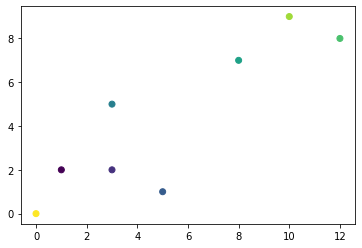

start iteration
end


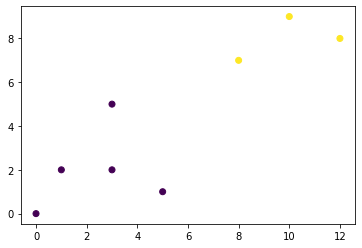

In [3]:
test_one = Clustering(outlier = False, k_num_center = 2, method = 'Mean')
test_one.run()

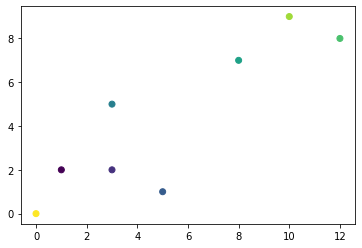

randomly create 2 centers
start iteration
end


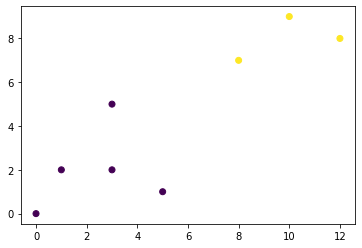

In [5]:
test_one = Clustering(outlier = False, k_num_center = 2, method = 'medoid')
test_one.run()

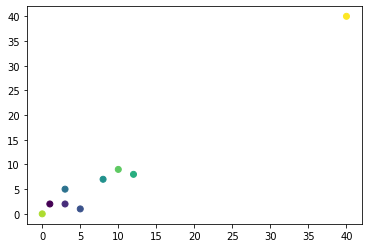

start iteration
end


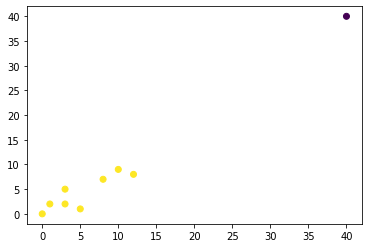

In [6]:
test_one = Clustering(outlier = True, k_num_center = 2, method = 'Mean')
test_one.run()

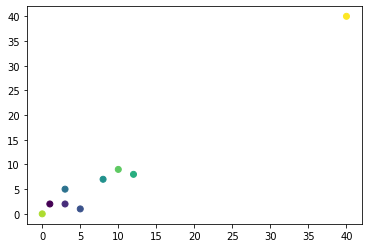

randomly create 2 centers
start iteration
end


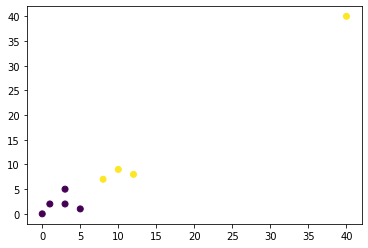

In [7]:
test_one = Clustering(outlier = True, k_num_center = 2, method = 'medoid')
test_one.run()

c. We can see that kmediod accounts for the weight of the outliers in creating clusters and are not much impacted in the presence of outliers in the data. On the otherhand, k means is heavily affected by the presence of outliers but works just as well when outliers = False